In [36]:
import sys
sys.path.insert(0, "../..")

In [37]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.masterequation import MasterEquation
import module.components.CONST as CONST

/tmp/ipykernel_1262/4240333005.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [38]:
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [52]:
me = MasterEquation(0.05, 0)
net = me.net

phase_space = np.expand_dims(me.phase_space, axis = -1)

probs = me.solve(N = 5000)

In [53]:
def rate_to_particle(n):
    return net.calc_rate_from_electrode(n, 0) + net.calc_rate_from_electrode(n, 1)

def rate_from_particle(n):
    return net.calc_rate_to_electrode(n, 0) + net.calc_rate_to_electrode(n, 1)

def I(n):
    return rate_to_particle(n) - rate_from_particle(n)

def I_dag(n):
    return rate_to_particle(n) + rate_from_particle(n)

def dn2(n):
    return 2 * n[:, 0] * I(n) + I_dag(n)

def mean(n):
    return n[:, 0]

In [54]:
def expect(func, probs):
    return np.sum(func(phase_space) * probs)

## Explanation
We solve the single-electron-transistor by master equation until convergence. Thus, we have found the correct distribution. To check for validity of our equations, we calculate the expectation values of the time derivatives of the first two moments. They should equate to zero, what, joyfully, they do (eps = 1e-11).

Apparently, the change in masterequation and change in first moment have the same order of magnitude.

In [55]:
expect(I, probs)

3.441691376338079e-14

In [56]:
expect(dn2, probs)

4.8405723873655885e-14

### Bonum!
---

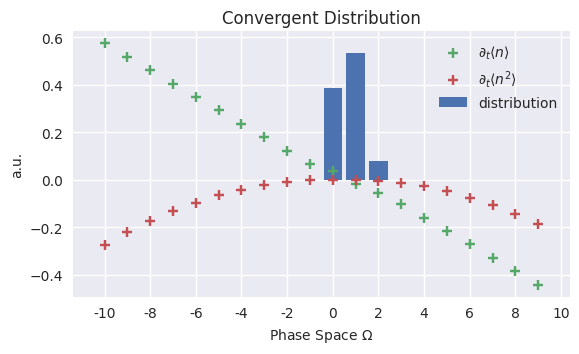

In [58]:
plt.figure(figsize=set_size())
plt.bar(phase_space[10:30, 0], probs[10:30], label = "distribution")
plt.scatter(phase_space[10:30, 0], I(phase_space)[10:30] / 200, marker = "+", label = "$\\partial_t \\langle n \\rangle$")
plt.scatter(phase_space[10:30, 0], dn2(phase_space)[10:30] / 8000, marker = "+", label = "$\\partial_t \\langle n^2 \\rangle$")
plt.legend()
plt.xlabel("Phase Space $\Omega$")
plt.xticks(np.arange(-10,11, 2), np.arange(-10,11,2))
plt.ylabel("a.u.")
plt.title("Convergent Distribution")
plt.tight_layout()
plt.savefig("../../output/misc/convergent_distribution.pdf")
